In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import janitor

In [ ]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [ ]:
# type(student_performance.data)  # <class 'ucimlrepo.data.DataFrame'>

In [ ]:
# student_performance  # Display the first few rows of the dataset

In [ ]:
# student_performance.data.features.head()  # Display the first few rows of features

In [ ]:
# student_performance.data.targets.head()  # Display the first few rows of targets

In [ ]:
credit_features_data = credit_data.data.features  # Display the first few rows of features
credit_features_data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [ ]:
credit_target_data = credit_data.data.targets  # Display the first few rows of targets
credit_target_data.head()

,class
0,1
1,2
2,1
3,1
4,2


In [ ]:
credit_data.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [ ]:
student_performance.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [ ]:
# print(student_performance.data.features.isnull().sum())  # Check for missing values in features
# print(credit_data.data.features.isnull().sum())  # Check for missing values in features
# print(student_performance.data.targets.isnull().sum())  # Check for missing values in targets
# print(credit_data.data.targets.isnull().sum())  # Check for missing values in targets

In [ ]:
# students_targets_data = student_performance.data.targets  # Display the first few rows of the dataset
# students_targets_data.head()

In [ ]:
# students_features_data = student_performance.data.features  # Display the first few rows of the dataset
# students_features_data.head()

In [ ]:
# student_performance.data.features.columns

In [ ]:
# student_performance.data.features.info()

In [ ]:
# num_students_cols = student_performance.data.features.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_students_cols = student_performance.data.features.dtypes == 'int64'
num_students_cols = num_students_cols[num_students_cols].index.tolist()
print(num_students_cols)  # Display the names of numeric columns

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [ ]:
cat_students_cols = student_performance.data.features.select_dtypes(include=['object']).columns.tolist()
print(cat_students_cols)  # Display the names of categorical columns

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [ ]:
# corr_matrix = student_performance.data.features[num_students_cols].corr()  # Calculate the correlation matrix for numeric features
# print(corr_matrix)  # Display the correlation matrix of numeric features

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Matrix of Student Performance Features')
# plt.show()  # Show the plot

In [ ]:
# Filter correlations greater than 0.5
# high_corr = corr_matrix[(corr_matrix > 0.5)]  # Filter correlations greater than 0.5
# high_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')  # Drop rows and columns with all NaN values
# print(high_corr)  # Display high correlations

In [ ]:
# Display the columns with high correlations
# high_corr_columns = high_corr.columns[high_corr.any()].tolist()
# high_corr_columns = [col for col in high_corr_columns if col in num_students_cols]
# print("Columns with high correlations:", high_corr_columns)  # Display the columns with high correlations

# # Plot the distribution of numeric features
# for col in num_students_cols:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(student_performance.data.features[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()  # Show the plot for each numeric feature

In [ ]:
student_mat = pd.read_csv('../datasets/student-mat.csv', sep=';')  # Load the student performance dataset
student_por = pd.read_csv('../datasets/student-por.csv', sep=';')  # Load the student performance dataset for Portuguese students

merge_cols = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]

# student_performance = pd.merge(student_mat, student_por, on=merge_cols)  # Merge the two datasets on specified columns
student_performance = pd.concat([student_mat, student_por], ignore_index=True)  # Concatenate the two datasets

student_performance = student_performance.clean_names()  # Clean the column names
student_performance.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3', 'fatherd'],
      dtype='object')

In [ ]:
num_students_cols = student_performance.dtypes == 'int'
num_students_cols = num_students_cols[num_students_cols].index.tolist()
print(num_students_cols)

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']


In [ ]:
cat_students_cols = student_performance.select_dtypes(include=["object"]).columns.tolist()
cat_students_cols

['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'fatherd']

In [ ]:
# checking duplicates
student_performance.duplicated().sum()  # Check for duplicates in the merged dataset

np.int64(0)

In [ ]:
student_por.columns.sort_values()

Index(['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus',
       'Walc', 'absences', 'activities', 'address', 'age', 'failures',
       'famrel', 'famsize', 'famsup', 'fatherd', 'freetime', 'goout',
       'guardian', 'health', 'higher', 'internet', 'nursery', 'reason',
       'romantic', 'school', 'schoolsup', 'sex', 'studytime', 'traveltime'],
      dtype='object')

In [ ]:
student_mat.columns.sort_values()

Index(['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus',
       'Walc', 'absences', 'activities', 'address', 'age', 'failures',
       'famrel', 'famsize', 'famsup', 'freetime', 'goout', 'guardian',
       'health', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic',
       'school', 'schoolsup', 'sex', 'studytime', 'traveltime'],
      dtype='object')

In [ ]:
# Display dimensions of student_mat dataset
print(student_mat.shape)
print(student_por.shape)
print(student_performance.shape)  # Display dimensions of the merged dataset

(395, 33)
(649, 33)
(1044, 34)


In [ ]:
student_performance#.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,fatherd
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,NaN
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,NaN
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,NaN
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,no
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,no
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,no
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,no


In [ ]:
num_students_cols = student_performance.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get numeric columns
print(num_students_cols)  # Display the names of numeric columns
cat_students_cols = student_performance.select_dtypes(include=['object']).columns.tolist()  # Get categorical columns
print(cat_students_cols)  # Display the names of categorical columns

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']
['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'fatherd']


In [ ]:
student_performance[num_students_cols].describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
corr_matrix = student_performance[num_students_cols].corr()  # Calculate the correlation matrix for numeric features
print(corr_matrix)  # Display the correlation matrix of numeric features

                 age      medu      fedu  traveltime  studytime  failures  \
age         1.000000 -0.130196 -0.138521    0.049216  -0.007870  0.282364   
medu       -0.130196  1.000000  0.642063   -0.238181   0.090616 -0.187769   
fedu       -0.138521  0.642063  1.000000   -0.196328   0.033458 -0.191390   
traveltime  0.049216 -0.238181 -0.196328    1.000000  -0.081328  0.087177   
studytime  -0.007870  0.090616  0.033458   -0.081328   1.000000 -0.152024   
failures    0.282364 -0.187769 -0.191390    0.087177  -0.152024  1.000000   
famrel      0.007162  0.015004  0.013066   -0.012578   0.012324 -0.053676   
freetime    0.002645  0.001054  0.002142   -0.007403  -0.094429  0.102679   
goout       0.118510  0.025614  0.030075    0.049740  -0.072941  0.074683   
dalc        0.133453  0.001515 -0.000165    0.109423  -0.159665  0.116336   
walc        0.098291 -0.029331  0.019524    0.084292  -0.229073  0.107432   
health     -0.029129 -0.013254  0.034288   -0.029002  -0.063044  0.048311   

In [ ]:
corr_matrix['g1'].sort_values(ascending=False)  

g1            1.000000
g2            0.858739
g3            0.809142
medu          0.226101
studytime     0.211314
fedu          0.195898
famrel        0.036947
freetime     -0.051985
health       -0.060478
absences     -0.092425
goout        -0.101163
traveltime   -0.121053
age          -0.124121
walc         -0.142401
dalc         -0.150943
failures     -0.374175
Name: g1, dtype: float64

In [ ]:
corr_matrix['g2'].sort_values(ascending=False)  # Sort the correlation values for the Portuguese grade column

g2            1.000000
g3            0.910743
g1            0.858739
medu          0.224662
studytime     0.183167
fedu          0.182634
famrel        0.042054
freetime     -0.068952
health       -0.088001
absences     -0.089332
goout        -0.108411
age          -0.119475
walc         -0.128114
dalc         -0.131576
traveltime   -0.140163
failures     -0.377172
Name: g2, dtype: float64

In [ ]:
corr_matrix['g3'].sort_values(ascending=False)  # Sort the correlation values for the Portuguese grade column
# after sorting, get positive correlations
positive_corr = corr_matrix['g3'][corr_matrix['g3'] > 0].sort_values(ascending=False)  # Get positive correlations for the Portuguese grade column
print(positive_corr)  # Display the positive correlations for the Portuguese grade column

g3           1.000000
g2           0.910743
g1           0.809142
medu         0.201472
studytime    0.161629
fedu         0.159796
famrel       0.054461
Name: g3, dtype: float64


In [ ]:
type(positive_corr)  # Check the type of positive_corr
positive_corr = positive_corr.index.tolist()  # Convert the index to a list
# exclude g3 and g2 from the list
positive_corr = [col for col in positive_corr if col not in ['g2', 'g1']]
print(positive_corr)  # Display the list of features with positive correlations to the Portuguese grade column

['g3', 'medu', 'studytime', 'fedu', 'famrel']


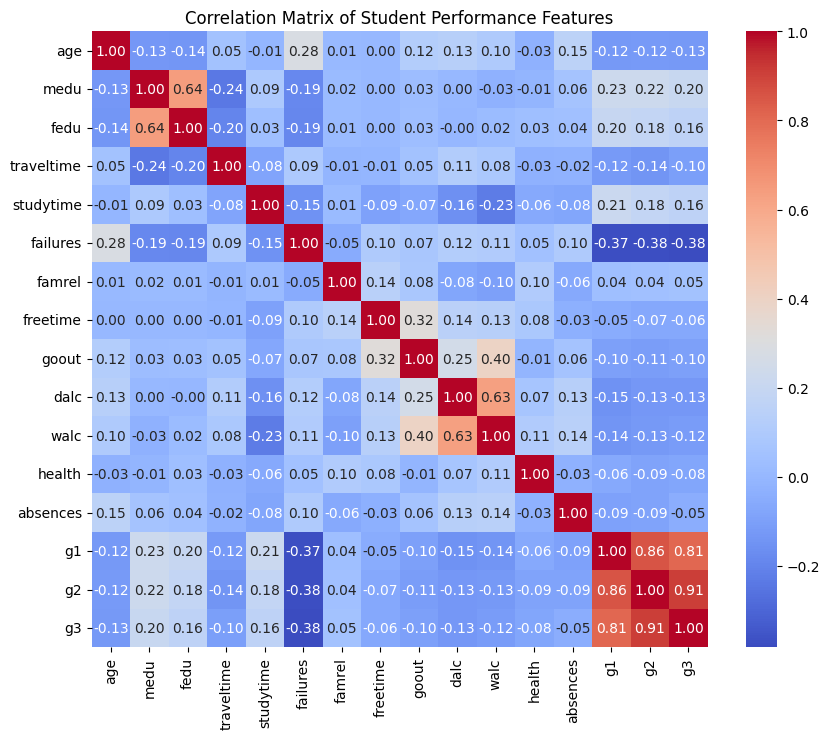

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Student Performance Features')
plt.show()  # Show the plot

In [ ]:
student_performance.columns.sort_values(ascending=True)  # Sort the column names of the dataset

Index(['absences', 'activities', 'address', 'age', 'dalc', 'failures',
       'famrel', 'famsize', 'famsup', 'fatherd', 'fedu', 'fjob', 'freetime',
       'g1', 'g2', 'g3', 'goout', 'guardian', 'health', 'higher', 'internet',
       'medu', 'mjob', 'nursery', 'paid', 'pstatus', 'reason', 'romantic',
       'school', 'schoolsup', 'sex', 'studytime', 'traveltime', 'walc'],
      dtype='object')

In [ ]:
# Correlation greater than 0.5 with g2portuguese
high_corr = corr_matrix[(corr_matrix['g3'] >= 0.5) | (corr_matrix['g3'] <= -0.5)]  # Filter correlations greater than 0.5 or less than -0.5
high_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')
high_corr

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
g1,-0.124121,0.226101,0.195898,-0.121053,0.211314,-0.374175,0.036947,-0.051985,-0.101163,-0.150943,-0.142401,-0.060478,-0.092425,1.000000,0.858739,0.809142
g2,-0.119475,0.224662,0.182634,-0.140163,0.183167,-0.377172,0.042054,-0.068952,-0.108411,-0.131576,-0.128114,-0.088001,-0.089332,0.858739,1.000000,0.910743
g3,-0.125282,0.201472,0.159796,-0.102627,0.161629,-0.383145,0.054461,-0.064890,-0.097877,-0.129642,-0.115740,-0.080079,-0.045671,0.809142,0.910743,1.000000


In [ ]:
high_corr_columns = high_corr.columns[high_corr.any()].tolist()  # Get columns with high correlations
# print("Columns with high correlations with G2portuguese:", high_corr_columns)  # Display the columns with high correlations

# Plot the distribution of numeric features
# for col in high_corr_columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(student_performance[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()  # Show the plot for each numeric feature

high_corr_columns = [col for col in high_corr_columns if col in num_students_cols]  # Filter high correlation columns to include only numeric ones
high_corr_columns

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3']

In [ ]:
# plot positive correlations with g2portuguese
from pandas.plotting import scatter_matrix

# # Create a scatter matrix for features with positive correlations
# scatter_matrix(student_performance[positive_corr], figsize=(16, 16), alpha=0.2, diagonal='kde') 

In [ ]:
print(positive_corr)

['g3', 'medu', 'studytime', 'fedu', 'famrel']


- **medu:** mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **fedu:** father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **famrel:** quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **studytime:** weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **g3:** final grade (numeric: from 0 to 20, output target)

In [ ]:
student_correlated_cols = student_performance[positive_corr]
student_correlated_cols.head()

,g3,medu,studytime,fedu,famrel
0,6,4,2,4,4
1,6,1,2,1,5
2,10,1,2,1,4
3,15,4,3,2,3
4,10,3,2,3,4


In [ ]:
X = student_performance.drop(columns=['g3'])  # Create a copy of the dataset
y = student_performance['g3'] # Separate the target variable (final grade) from the features
print(X.shape, y.shape)  # Display the shapes of features and target variable

(1044, 33) (1044,)


In [ ]:
print(num_students_cols)
print(cat_students_cols)

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']
['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'fatherd']


In [ ]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   pstatus     1044 non-null   object
 6   medu        1044 non-null   int64 
 7   fedu        1044 non-null   int64 
 8   mjob        1044 non-null   object
 9   fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        395 non-null    object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with the mean
    StandardScaler()  # Standardize numeric features
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

num_students_cols = [col for col in num_students_cols if col != 'g3']
cat_students_cols = [col for col in cat_students_cols if col != 'g3']

pipeline = ColumnTransformer([
        ('numerical', numerical_pipeline, num_students_cols),
        ('categorical', categorical_pipeline, cat_students_cols)
])

students_performance_prep = pipeline.fit_transform(student_performance)  # Fit and transform the dataset using the pipeline

In [ ]:
students_performance_prep.shape

(1044, 60)

In [ ]:
# get feature names after transformation
feature_names = (pipeline.named_transformers_['categorical']
                 .named_steps['onehotencoder']
                 .get_feature_names_out(cat_students_cols))
feature_names
# Combine numerical and categorical feature names
# feature_names = np.concatenate([num_students_cols, feature_names])
# students_performance_prep = pd.DataFrame(students_performance_prep, columns=feature_names)  # Create a DataFrame with the transformed features
# students_performance_prep.head()  # Display the first few rows of the transformed dataset

array(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'pstatus_A',
       'pstatus_T', 'mjob_at_home', 'mjob_health', 'mjob_other',
       'mjob_services', 'mjob_teacher', 'fjob_at_home', 'fjob_health',
       'fjob_other', 'fjob_services', 'fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes',
       'fatherd_no', 'fatherd_yes'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
student_labels = student_performance.columns.tolist()
student_labels

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3',
 'fatherd']

In [ ]:
full_pipeline = Pipeline([
    ('preprocess', pipeline),  # Your preprocessing pipeline
    ('regressor', KNeighborsRegressor())  # Placeholder regressor
])

parameters_grid = [
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [2, 3, 5, 7, 9],
        'regressor__weights': ['uniform', 'distance']
    },
    {
        'regressor': [SVR()],
        'regressor__gamma': [0.001, 0.01, 0.1, 1],
        'regressor__C': [1, 10, 100],
        'regressor__kernel': ['rbf', 'poly'],
        'regressor__epsilon': [0.1, 0.2, 0.3],
        'regressor__degree': [1, 2, 3]
    },
    {
        'regressor': [DecisionTreeRegressor(random_state=42)],
        'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'regressor__max_depth': range(1, 20, 2)
    },
    {
        'regressor': [RandomForestRegressor(random_state=42)],
        'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'regressor__n_estimators': [100, 200, 300]
    },
    {
        'regressor': [GradientBoostingRegressor(random_state=42)],
        'regressor__max_depth': [1, 2, 3],
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.1, 0.5, 1.0]
    }
]

grid_search = GridSearchCV(
    full_pipeline,
    param_grid=parameters_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"[{'regressor': [KNeighborsRegressor()], 'regressor__n_neighbors': [2, 3, ...], 'regressor__weights': ['uniform', 'distance']}, {'regressor': [SVR()], 'regressor__C': [1, 10, ...], 'regressor__degree': [1, 2, ...], 'regressor__epsilon': [0.1, 0.2, ...], ...}, ...]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numerical', ...), ('categorical', ...)]"


In [ ]:
# A full pipeline for classification models, parameters grid, and grid search
classification_pipeline = Pipeline([
    ('preprocess', pipeline),  # Your preprocessing pipeline
    ('classifier', KNeighborsClassifier())  # Placeholder classifier
])

parameters_grid_classification = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2, 3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    {
        'classifier': [SVC()],
        'classifier__gamma': [0.001, 0.01, 0.1, 1],
        'classifier__C': [1, 10, 100],
        'classifier__kernel': ['rbf', 'poly'],
        'classifier__degree': [1, 2, 3]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': range(1, 20, 2)
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [100, 200, 300]
    },
    {
        'classifier': [AdaBoostClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.5, 1.0]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__max_depth': [1, 2, 3],
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.1, 0.5, 1.0]
    }
]

grid_search_classification = GridSearchCV(
    classification_pipeline,
    param_grid=parameters_grid_classification,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

grid_search_classification.fit(X_train, y_train)

/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,estimator,Pipeline(step...lassifier())])
,param_grid,"[{'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': [2, 3, ...], 'classifier__weights': ['uniform', 'distance']}, {'classifier': [SVC()], 'classifier__C': [1, 10, ...], 'classifier__degree': [1, 2, ...], 'classifier__gamma': [0.001, 0.01, ...], ...}, ...]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numerical', ...), ('categorical', ...)]"


In [ ]:
grid_search

,estimator,Pipeline(step...Regressor())])
,param_grid,"[{'regressor': [KNeighborsRegressor()], 'regressor__n_neighbors': [2, 3, ...], 'regressor__weights': ['uniform', 'distance']}, {'regressor': [SVR()], 'regressor__C': [1, 10, ...], 'regressor__degree': [1, 2, ...], 'regressor__epsilon': [0.1, 0.2, ...], ...}, ...]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numerical', ...), ('categorical', ...)]"


In [ ]:
print("Best parameters found for regression: ", grid_search.best_params_)  # Display the best parameters found by GridSearchCV
print("Best score (RMSE) for regression: ", -grid_search.best_score_)  # Display the best score (negative RMSE) found by GridSearchCV

Best parameters found for regression:  {'regressor': GradientBoostingRegressor(random_state=42), 'regressor__learning_rate': 0.1, 'regressor__max_depth': 2, 'regressor__n_estimators': 100}
Best score (RMSE) for regression:  1.3776211171670454


In [ ]:
print("Best parameters for classification: ", grid_search_classification.best_params_)  # Display the best parameters found by GridSearchCV for classification
print("Best score (RMSE) for classification: ", -grid_search_classification.best_score_)  # Display the best score (negative RMSE) found by GridSearchCV for classification

Best parameters for classification:  {'classifier': DecisionTreeClassifier(random_state=42), 'classifier__criterion': 'entropy', 'classifier__max_depth': 5}
Best score (RMSE) for classification:  1.5582547807616298


In [ ]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_  # Get the best model from the grid search
best_model

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)  # Evaluate the best model on the test set
# print("Test score (R^2): ", test_score)  # Display the test score (R^2) of the best model

# Predict the final grades using the best model
predictions = best_model.predict(X_test)  # Predict the final grades using the best model
# print("Predictions: ", predictions)  # Display the predictions made by the best model

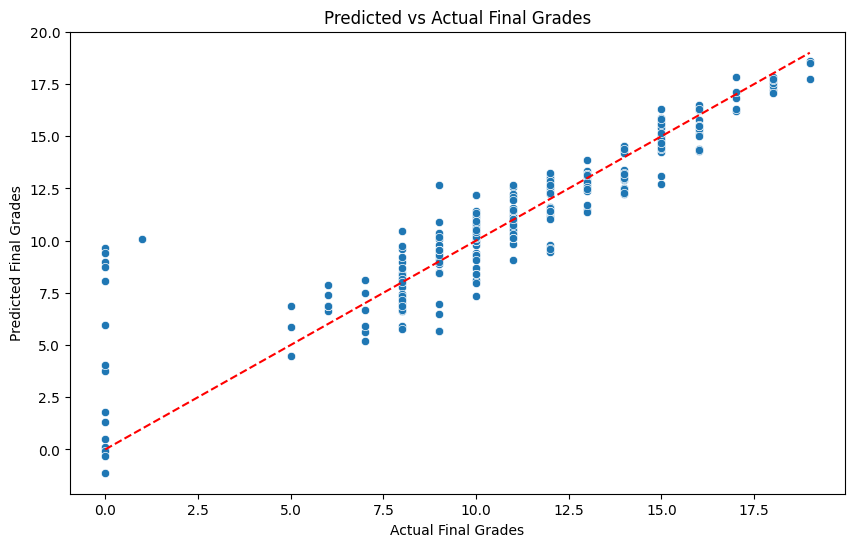

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Predicted vs Actual Final Grades')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Add a diagonal line for reference
plt.show()  # Show the plot of predictions vs actual values

False
Loaded Predictions:  [10.27446006  7.9559697  13.84360384 11.11089231 12.4826875  12.58919566
  3.76226124 11.09094489 14.73042468 13.20701626 15.76882985  4.03685083
  7.47447136 12.17474555  8.15458162 12.64720825  9.63647323 16.24057204
 11.23022328 12.20964678 10.03613123 16.19085323 11.22532866  0.12828615
 15.69364388 11.39530288 16.84725388 16.29073326 11.12808314  9.47334251
 10.26511027 10.32065135 17.83960127 10.83848889 15.5542397  14.5363602
 15.0538531  17.62314011  9.81803864 13.13381579 15.45673729 17.11966417
 11.21100862  8.04145322 14.86225957  9.82604234 10.90187251 16.28502305
 12.75232154 11.4008726  11.43028078 15.30008435 10.60146244  9.36901857
  6.68865312 11.1077062  11.15897626 13.16101833 17.2156535   8.42738531
  9.81183353  6.4958685   6.94549145 12.5284506   6.99710359  9.57915444
  9.07510848  5.92418493 10.7316746  17.42757397 11.56515238 14.51525188
  9.49541684  8.67060948  8.12839871  9.25739317  5.61038152  7.77152801
  7.40809287 13.09640657 

<Axes: xlabel='g3'>

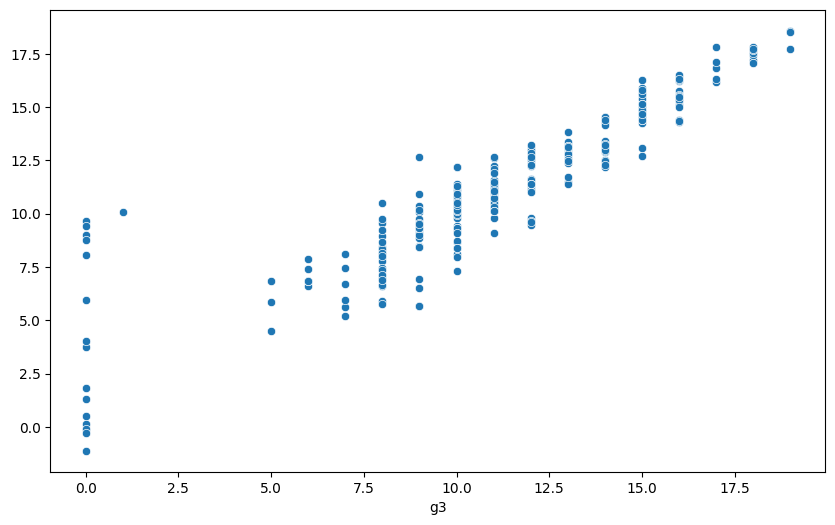

In [ ]:
# Save the best model to a file
import joblib
joblib.dump(best_model, 'best_student_performance_model.pkl')  # Save the best model to a file
# Load the saved model from the file
loaded_model = joblib.load('best_student_performance_model.pkl')  # Load the saved model from the file
# Verify that the loaded model is the same as the best model
print(loaded_model == best_model)  # Verify that the loaded model is the same as the best model
# Predict the final grades using the loaded model
loaded_predictions = loaded_model.predict(X_test)  # Predict the final grades using the loaded model
print("Loaded Predictions: ", loaded_predictions)  # Display the predictions made by the loaded model
# Plot the predictions vs actual values using the loaded model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=loaded_predictions) # Plot the predictions vs actual values using the loaded model

In [ ]:
student_performance.g3.dtype

dtype('int64')

In [ ]:
# Choosing hyperparametrics and models
models = [
    {
        'name': 'DecisionTreeRegressor',
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
            "max_depth": range(1,20,2),
        }
    },
    {
        'name': 'SVR',
        'model': SVR(),
        'params': {
            "gamma": [0.001, 0.01, 0.1, 1],
            'C': [1,10,50,100,200,300,1000],
            'kernel': ['rbf'],
        }
    },
    {
        'name': 'RandomForestRegressor',
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200, 300, 400],
            'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
        }
    },
    {
        'name': 'KNeighborsRegressor',
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [2,3,5,7,9],
            'weights': ['uniform', 'distance'],
        }
    },

]

5
best_models = []
for model_info in models:
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1) 
    grid_search.fit(X_train, y_train)  
    best_models.append({
        'name': model_info['name'],
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    })

ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'absolute_error', 'squared_error', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'absolute_error', 'friedman_mse', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/tree/_classes.py", line 1404, in fit
    super()._fit(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2966, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/pandas/core/generic.py", line 2168, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'GP'

--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'absolute_error', 'squared_error', 'friedman_mse'}. Got 'mae' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'}. Got 'mae' instead.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'absolute_error', 'friedman_mse', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "/home/jeremy/Documents/PLP/week-3/venv/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}. Got 'mae' instead.


In [ ]:
for best_model in best_models:
    print(f"Model: {best_model['name']} \nBest Parameters: {best_model['best_params']} \nBest Score: {round(best_model['best_score'], 2)}%")
    print("-" * 30)

  school sex  age address famsize pstatus  medu  fedu     mjob      fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout dalc  walc  health  absences  g1  g2  g3 fatherd Cluster  
0     4    1     1       3         6   5   6   6     NaN       1  
1     3    1     1       3         4   5   5   6     NaN       1  
2     2    2     3       3        10   7   8  10     NaN       0  
3     2    1     1       5         2  15  14  15     NaN       2  
4     2    1     2       5         4   6  10  10     NaN       1  

[5 rows x 35 columns]


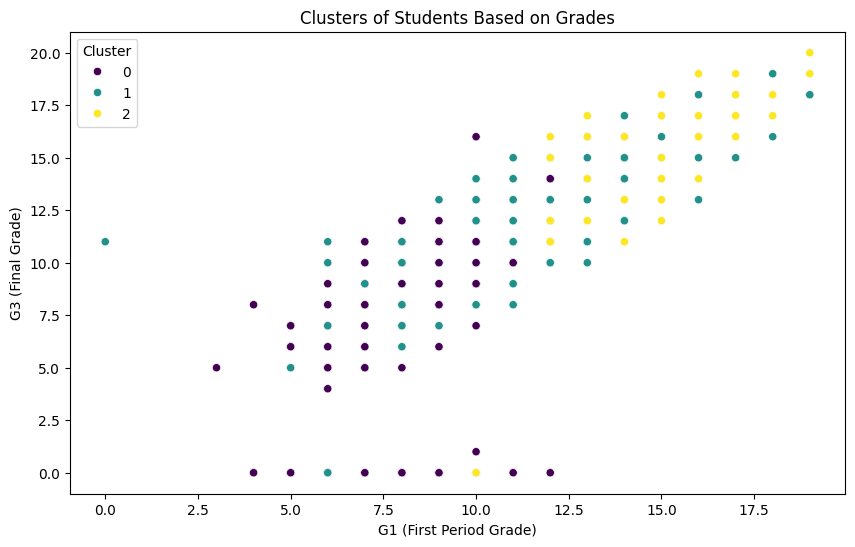

In [ ]:
# Clustering
from sklearn.cluster import KMeans
# Define the number of clusters
n_clusters = 3  # You can change this value based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Create a KMeans instance
# Fit the model to the data
kmeans.fit(students_performance_prep)  # Fit the KMeans model to the preprocessed data
# Get the cluster labels
cluster_labels = kmeans.labels_  # Get the cluster labels assigned by KMeans
# Add the cluster labels to the original dataset
student_performance['Cluster'] = cluster_labels  # Add the cluster labels to the original dataset
# Display the first few rows of the dataset with cluster labels
print(student_performance.head())  # Display the first few rows of the dataset with cluster labels
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=student_performance['g1'], y=student_performance['g3'], hue=student_performance['Cluster'], palette='viridis')
plt.title('Clusters of Students Based on Grades')
plt.xlabel('G1 (First Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.legend(title='Cluster')
plt.show()  # Show the plot of clusters based on grades

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Check for missing values
print("Missing values:\n", X.isnull().sum())

# Encode labels (already numeric, but for demo):
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


The accuracy of the decision tree classifier is 100%. 100% of correct predictions were made by the model. The model predicts all labels correctly.

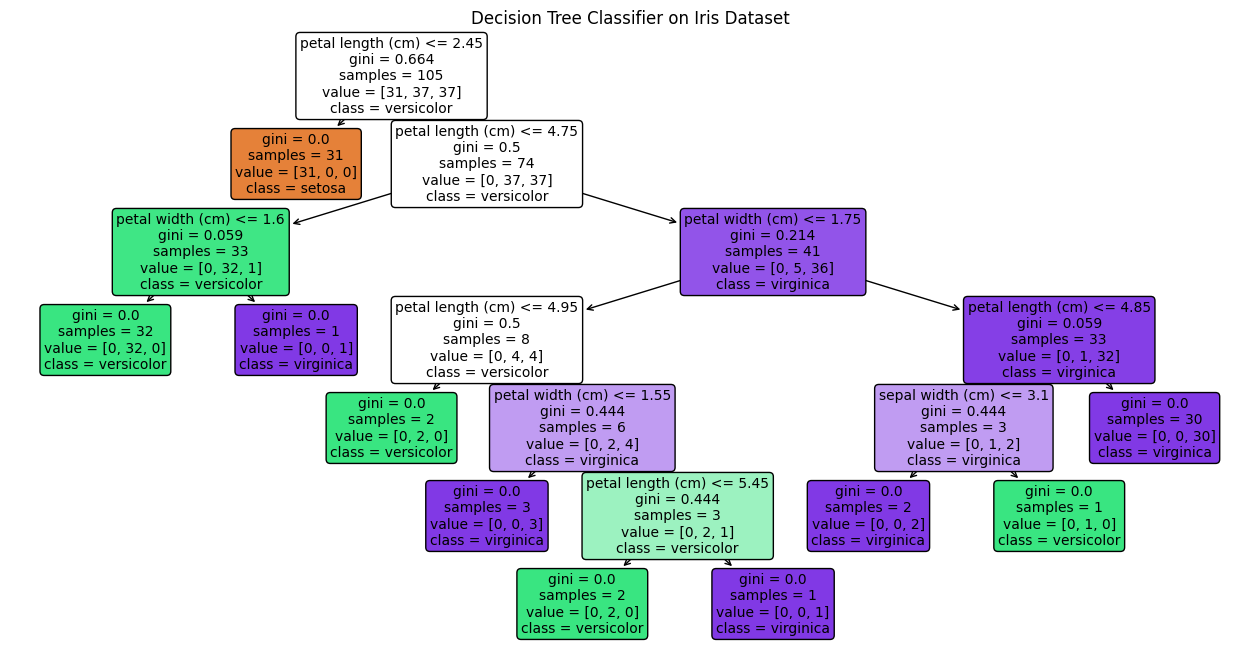

In [ ]:
# visualizing decision tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Classifier on Iris Dataset")
plt.show()